# Factors that have effect on the Borrower APR

### Investigation Overview

In this project we  want to focus on the factors that affect the Borrower APR. We focused on characteristics like, if the borrower is home owner, if it is on a group, its inconme range and others that we consider of importance.

### Dataset Overview

Prosper Marketplace is a  company in California dedicated to the peer-to-peer lending industry. 
This data set contains 113,937 loans with 81 variables on each loan of Prosper, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



### Wrangling Data

In this section we are going to gather, assess and cleaning our data. The data is stored in a csv file that we are going to read into a Pandas Data Frame.

In [21]:
## importing all the libraries that we are going to need for our study
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
## reading the csv file
loan_data=pd.read_csv('prosperLoanData.csv')
## creating a copy of our data frame
clean_loan=loan_data.copy()

In [23]:
## drop the variables with more than 33.3% of missing data
clean_loan=clean_loan.drop(['GroupKey', 'LoanFirstDefaultedCycleNumber',
       'ScorexChangeAtTimeOfListing', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'OnTimeProsperPayments',
       'TotalProsperPaymentsBilled', 'TotalProsperLoans',
       'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
       'CreditGrade', 'ClosedDate'], axis=1)

In [24]:
## drop the samples with missing values
clean_loan.dropna(inplace=True,axis=0)

Now our data frame has 69 variables and no missing values.

In [25]:
# Convert ProsperRating and IncomeRange into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
clean_loan['ProsperRating (Alpha)'] = clean_loan['ProsperRating (Alpha)'].astype(ordered_var)


inc_order = ['Not Employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = inc_order)
clean_loan['IncomeRange'] = clean_loan['IncomeRange'].astype(ordered_var)

## Distribution of Borrower APR

The distribution of BorrowerAPR looks bimodal with one big peak next to the 36% of APR. We found that the 98% of samples in this peak are not on a group.

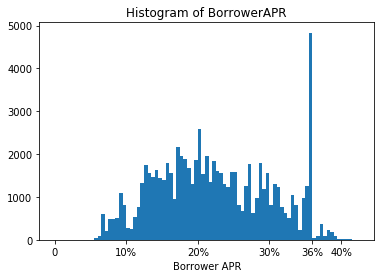

In [26]:
bins=np.arange(0,clean_loan['BorrowerAPR'].max()+0.005,0.005)
plt.hist(data=clean_loan, x='BorrowerAPR',bins=bins);
plt.title('Histogram of BorrowerAPR')
plt.xticks([0,0.1,0.2,0.3,0.36,0.4],[0,'10%','20%','30%','36%','40%'])
plt.xlabel('Borrower APR');

## IncomeRange vs BorrowerAPR

The Borrower APR meadian decrease as the Income Range increase. Categories corresponding to incomes below 50k have most of this samples with High APR and categories with incomes above 50k most of this samples with low APR.

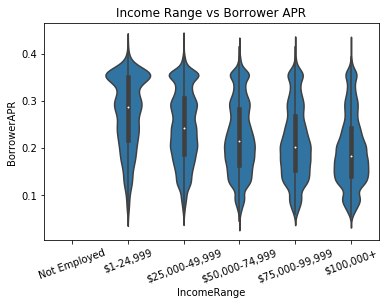

In [27]:
color=sns.color_palette()[0]
sns.violinplot(data=clean_loan,x='IncomeRange',y='BorrowerAPR',color=color);
plt.xticks(rotation=20);
plt.title('Income Range vs Borrower APR');

##  BorrowerAPR vs ProsperRating, CurrentlyInGroup, IsBorrowerHomeowner and Term

There is a strong relation between Prosper Rating and Borrower APR, borrowers with category HR has the high APR and borrowers with category AA have the lowest APR. We haven't found significant relations between Currently in Group and Term vs Borrower APR. Borrowers who are home owners have low APR.

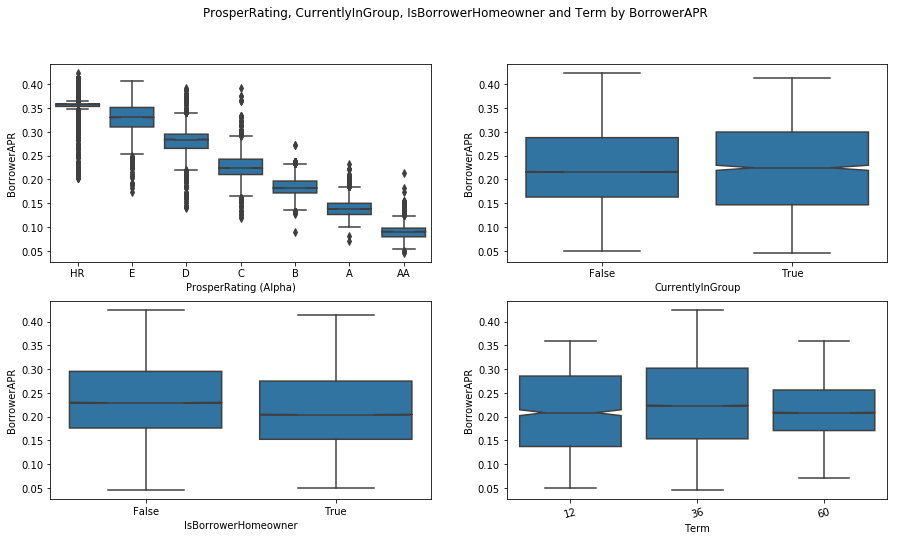

In [28]:
# function for plotting a boxgrid
def boxgrid(r,c,var,y,data,title):
    fig, ax = plt.subplots(nrows=r, ncols=c,figsize = [15,8])
    fig.suptitle(title);
    nrows=r
    ncols=c
    for i in range(len(var)):
        color=sns.color_palette()[0]
        sns.boxplot(data=data,x=var[i],y=y,color=color,ax=ax[i//c][i%c],notch=True);
        plt.xticks(rotation=15);

cat=['ProsperRating (Alpha)','CurrentlyInGroup', 'IsBorrowerHomeowner', 'Term']
fig=boxgrid(2,2,cat,'BorrowerAPR',clean_loan,'ProsperRating, CurrentlyInGroup, IsBorrowerHomeowner and Term by BorrowerAPR');


## Borrower APR across ProsperRating and Term

For Prosper Ratings of E,D and C the Borrower APR decrease with the increase of the term and for Prosper Ratings of B,A and AA the Borrower APR increase with the decrease of the term. 

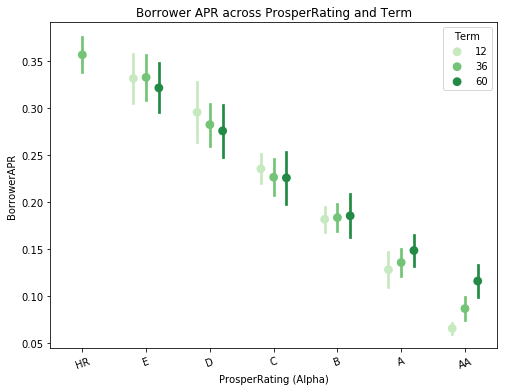

In [29]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = clean_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue =  'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
ax.set_title('Borrower APR across ProsperRating and Term')
plt.xticks(rotation=20)
plt.show();

## Borrower APR across IncomeRange and IsBorrowerHomeowner

The Borrower APR decrease with the increase of the income range with independence if the Borrower is home owner or not, and the borrower APR is low for home owners with income bigger than 25k.

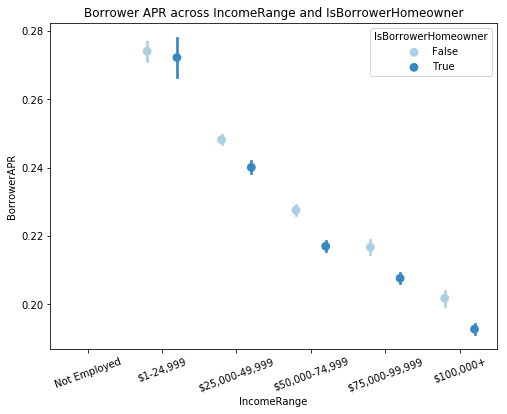

In [30]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = clean_loan, x = 'IncomeRange', y = 'BorrowerAPR', hue =  'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower APR across IncomeRange and IsBorrowerHomeowner')
plt.xticks(rotation=20)
plt.show();